<a href="https://colab.research.google.com/github/eltondeoliveirasilva/Redes_Neurais/blob/main/Case_completo_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
churn = pd.read_excel('/content/drive/MyDrive/churn_data.xlsx')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [81]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [82]:
churn.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [83]:
churn_agg = churn.groupby('Churn')['customerID'].count().reset_index()
churn_agg

,Churn,customerID
0,No,5163
1,Yes,1869


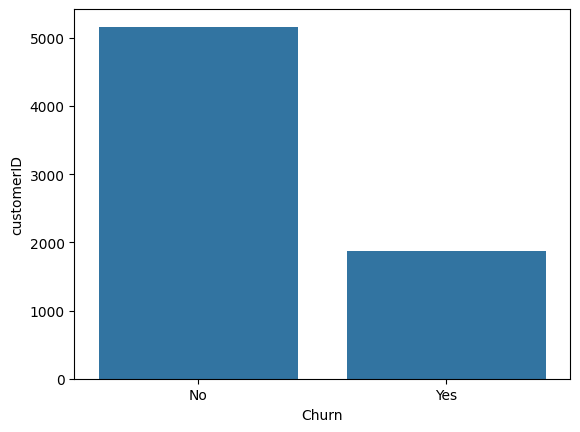

In [84]:
sns.barplot(x='Churn', y='customerID', data=churn_agg);


In [85]:
churn_payment = churn.groupby('PaymentMethod')['customerID'].count().reset_index()
churn_payment

,PaymentMethod,customerID
0,Bank transfer (automatic),1542
1,Credit card (automatic),1521
2,Electronic check,2365
3,Mailed check,1604


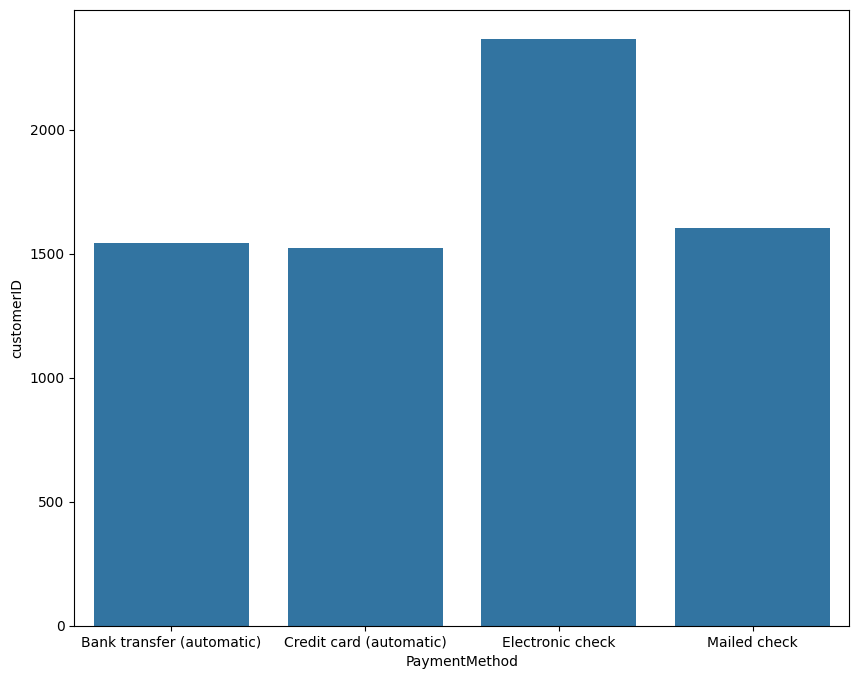

In [86]:
plt.figure(figsize=(10,8))
sns.barplot(x='PaymentMethod', y='customerID', data=churn_payment);

In [87]:
churn_gender = churn.groupby('gender')['customerID'].count().reset_index()
churn_gender

,gender,customerID
0,Female,3483
1,Male,3549


In [88]:
churn.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [89]:
x = churn.drop(columns =['Churn', 'customerID'], axis=1)

y = churn['Churn']

y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7027,No
7028,No
7029,No
7030,Yes


In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y)
y = le.transform(y)

In [91]:
x = pd.get_dummies(x)

In [92]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

x = pd.DataFrame(mm.fit_transform(x))


In [93]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [94]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr = model.fit(x_train, y_train)


In [95]:
lr.predict(x_test)

array([0, 0, 1, ..., 0, 1, 0])

In [96]:
x_test.assign(churn=y_test).assign(label=lr.predict(x_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
6691,0.0,0.380282,0.816915,0.320817,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
1298,0.0,0.619718,0.624378,0.405585,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
6847,0.0,0.338028,0.704975,0.271129,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
3384,0.0,0.774648,0.016915,0.127850,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
5985,0.0,0.577465,0.865174,0.505649,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,0.0,0.323944,0.800995,0.275617,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
6340,0.0,0.478873,0.014428,0.082114,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
5266,0.0,0.140845,0.353234,0.067990,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0
7021,1.0,0.000000,0.572139,0.006572,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1


In [97]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


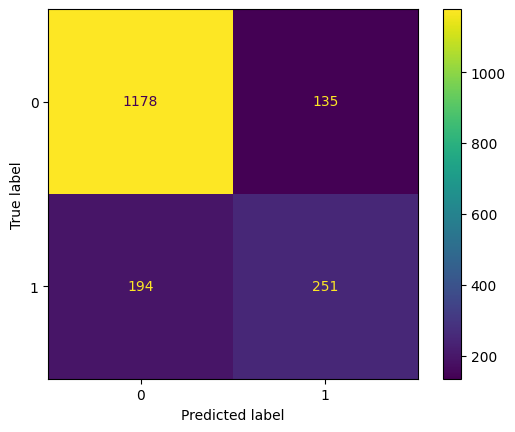

In [98]:
ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test)
plt.show()

In [99]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score,precision_score, recall_score, f1_score, roc_auc_score
print(f'Acurácia(Treino): {accuracy_score(y_train, lr.predict(x_train))}')
print(f'Acurácia(Teste): {accuracy_score(y_test, lr.predict(x_test))}')

print(f'Acurácia Balanceada(Treino): {balanced_accuracy_score(y_train, lr.predict(x_train))}')
print(f'Acurácia Balanceada(Teste): {balanced_accuracy_score(y_test, lr.predict(x_test))}')

print(f'Precisão (Treino): {precision_score(y_train, lr.predict(x_train))}')
print(f'Precisão Balanceada(Teste): {precision_score(y_test, lr.predict(x_test))}')

print(f'Recall (Treino): {recall_score(y_train, lr.predict(x_train))}')
print(f'Recall Balanceada(Teste): {recall_score(y_test, lr.predict(x_test))}')

print(f'F1 (Treino): {f1_score(y_train, lr.predict(x_train))}')
print(f'F1 Balanceada(Teste): {f1_score(y_test, lr.predict(x_test))}')

print(f'ROC AUC (Treino): {roc_auc_score(y_train, lr.predict_proba(x_train)[:,1])}')
print(f'ROC AUC Balanceada(Teste): {roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])}')


Acurácia(Treino): 0.8020477815699659
Acurácia(Teste): 0.8128555176336746
Acurácia Balanceada(Treino): 0.7225921129432366
Acurácia Balanceada(Teste): 0.730613484857561
Precisão (Treino): 0.6602023608768971
Precisão Balanceada(Teste): 0.6502590673575129
Recall (Treino): 0.5498595505617978
Recall Balanceada(Teste): 0.5640449438202247
F1 (Treino): 0.6000000000000001
F1 Balanceada(Teste): 0.6040914560770156
ROC AUC (Treino): 0.8461359076316941
ROC AUC Balanceada(Teste): 0.8500004278733837


In [100]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [101]:
rf.predict(x_test)

array([0, 0, 1, ..., 1, 1, 0])

In [102]:
x_test.assign(churn=y_test).assign(label=rf.predict(x_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
6691,0.0,0.380282,0.816915,0.320817,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
1298,0.0,0.619718,0.624378,0.405585,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
6847,0.0,0.338028,0.704975,0.271129,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
3384,0.0,0.774648,0.016915,0.127850,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
5985,0.0,0.577465,0.865174,0.505649,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,0.0,0.323944,0.800995,0.275617,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0
6340,0.0,0.478873,0.014428,0.082114,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
5266,0.0,0.140845,0.353234,0.067990,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1
7021,1.0,0.000000,0.572139,0.006572,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1


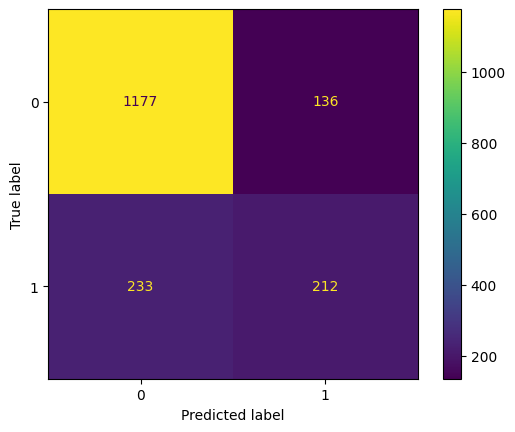

In [103]:
ConfusionMatrixDisplay.from_estimator(rf, x_test, y_test)
plt.show()

In [104]:
print(f'Acurácia(Treino): {accuracy_score(y_train, rf.predict(x_train))}')
print(f'Acurácia(Teste): {accuracy_score(y_test, rf.predict(x_test))}')

print(f'Acurácia Balanceada(Treino): {balanced_accuracy_score(y_train, rf.predict(x_train))}')
print(f'Acurácia Balanceada(Teste): {balanced_accuracy_score(y_test, rf.predict(x_test))}')

print(f'Precisão (Treino): {precision_score(y_train, rf.predict(x_train))}')
print(f'Precisão (Teste): {precision_score(y_test, rf.predict(x_test))}')

print(f'Recall (Treino): {recall_score(y_train, rf.predict(x_train))}')
print(f'Recall (Teste): {recall_score(y_test, rf.predict(x_test))}')

print(f'F1 (Treino): {f1_score(y_train, rf.predict(x_train))}')
print(f'F1 (Teste): {f1_score(y_test, rf.predict(x_test))}')

print(f'ROC AUC (Treino): {roc_auc_score(y_train, rf.predict_proba(x_train)[:,1])}')
print(f'ROC AUC (Teste): {roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])}')

Acurácia(Treino): 0.9984831247629883
Acurácia(Teste): 0.7901023890784983
Acurácia Balanceada(Treino): 0.998076025098497
Acurácia Balanceada(Teste): 0.6864124528269595
Precisão (Treino): 0.9971910112359551
Precisão Balanceada(Teste): 0.6091954022988506
Recall (Treino): 0.9971910112359551
Recall Balanceada(Teste): 0.4764044943820225
F1 (Treino): 0.9971910112359551
F1 Balanceada(Teste): 0.5346784363177806
ROC AUC (Treino): 0.9999302312855685
ROC AUC Balanceada(Teste): 0.8133530725587684


In [105]:
from sklearn.model_selection import GridSearchCV
from seaborn.axisgrid import Grid

In [106]:
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10],
              'n_estimators':[100,300,500]
              }

grid_search = GridSearchCV(rf,parameters,scoring='accuracy', cv=5,n_jobs=-1)

In [107]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [108]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [109]:
rf_tunned = RandomForestClassifier(bootstrap= True,
ccp_alpha= 0.0,
class_weight= None,
criterion= 'gini',
max_depth= 7,
max_features= 'sqrt',
max_leaf_nodes= None,
max_samples= None,
min_impurity_decrease= 0.0,
min_samples_leaf= 1,
min_samples_split= 2,
min_weight_fraction_leaf= 0.0,
n_estimators= 500,
n_jobs= None,
oob_score= False,
random_state= None,
verbose= 0,
warm_start= False
)


In [110]:
rf_tunned

RandomForestClassifier(max_depth=7, n_estimators=500)

In [111]:
rf_tunned.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=500)

In [112]:
rf_tunned.predict(x_test)

array([0, 0, 1, ..., 0, 1, 0])

In [113]:
x_test.assign(churn=y_test).assign(label=rf_tunned.predict(x_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
6691,0.0,0.380282,0.816915,0.320817,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
1298,0.0,0.619718,0.624378,0.405585,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
6847,0.0,0.338028,0.704975,0.271129,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
3384,0.0,0.774648,0.016915,0.127850,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
5985,0.0,0.577465,0.865174,0.505649,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,0.0,0.323944,0.800995,0.275617,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
6340,0.0,0.478873,0.014428,0.082114,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
5266,0.0,0.140845,0.353234,0.067990,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0
7021,1.0,0.000000,0.572139,0.006572,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1


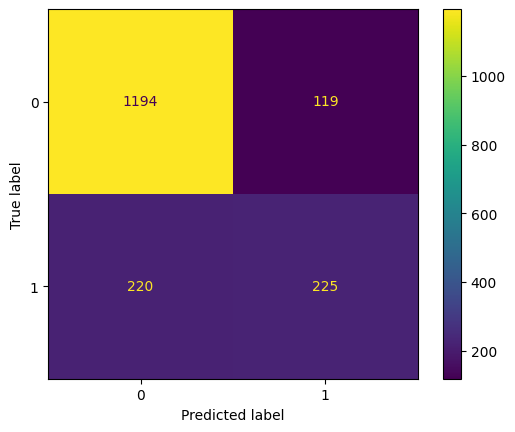

In [114]:
ConfusionMatrixDisplay.from_estimator(rf_tunned, x_test, y_test)
plt.show()

In [115]:
print(f'Acurácia(Treino): {accuracy_score(y_train, rf_tunned.predict(x_train))}')
print(f'Acurácia(Teste): {accuracy_score(y_test, rf_tunned.predict(x_test))}')

print(f'Acurácia Balanceada(Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(x_train))}')
print(f'Acurácia Balanceada(Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(x_test))}')

print(f'Precisão (Treino): {precision_score(y_train, rf_tunned.predict(x_train))}')
print(f'Precisão (Teste): {precision_score(y_test, rf_tunned.predict(x_test))}')

print(f'Recall (Treino): {recall_score(y_train, rf_tunned.predict(x_train))}')
print(f'Recall (Teste): {recall_score(y_test, rf_tunned.predict(x_test))}')

print(f'F1 (Treino): {f1_score(y_train, rf_tunned.predict(x_train))}')
print(f'F1 (Teste): {f1_score(y_test, rf_tunned.predict(x_test))}')

print(f'ROC AUC (Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(x_train)[:,1])}')
print(f'ROC AUC (Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(x_test)[:,1])}')

Acurácia(Treino): 0.8217671596511187
Acurácia(Teste): 0.8071672354948806
Acurácia Balanceada(Treino): 0.7356560995184591
Acurácia Balanceada(Teste): 0.7074929186954997
Precisão (Treino): 0.7244897959183674
Precisão Balanceada(Teste): 0.6540697674418605
Recall (Treino): 0.5484550561797753
Recall Balanceada(Teste): 0.5056179775280899
F1 (Treino): 0.6243005595523582
F1 Balanceada(Teste): 0.5703422053231939
ROC AUC (Treino): 0.8878040639136144
ROC AUC Balanceada(Teste): 0.8477592270895198
